In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data = pd.read_csv("Training_set_heights200.csv")

In [2]:
data

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943
...,...,...
194,135.2500,68.41222
195,109.5143,66.49607
196,139.6043,67.84894
197,134.3672,67.27839


In [21]:
from sklearn import preprocessing
MM = preprocessing.MinMaxScaler()
x = MM.fit_transform(data)
print(x)

[[0.55738247 0.53872437]
 [0.49548119 0.40985671]
 [0.64949743 0.4243548 ]
 [0.95203779 0.98519959]
 [0.67375104 0.66730199]
 [0.43738377 0.34466862]
 [0.34908247 0.50992308]
 [0.60113031 0.68675989]
 [0.73623936 0.75590033]
 [0.37092206 0.46972895]
 [0.46437503 0.39039343]
 [0.60406131 0.59593869]
 [0.79874449 0.71333218]
 [0.47575998 0.35674282]
 [0.49263425 0.55948975]
 [0.62913734 0.59716023]
 [1.         0.60338839]
 [0.54525776 0.3960699 ]
 [0.64237588 0.57734553]
 [0.73658121 0.8075786 ]
 [0.54945671 0.68787861]
 [0.75975041 0.65702327]
 [0.55166617 0.80390401]
 [0.73663586 0.72803437]
 [0.34895497 0.56025398]
 [0.64312404 0.59457137]
 [0.57725078 0.4842585 ]
 [0.41982578 0.39622106]
 [0.60528863 0.44350885]
 [0.60712822 0.32756095]
 [0.81467165 0.79411713]
 [0.38697672 0.18244576]
 [0.46978589 0.62691681]
 [0.76756548 0.43440256]
 [0.48096068 0.57167827]
 [0.39468531 0.6278859 ]
 [0.51695651 0.31010646]
 [0.6818239  0.85938194]
 [0.41629793 0.45115651]
 [0.57152048 0.43224569]


In [22]:
def gd(xt,yt,m_b,n_b,L):
    D_m=0
    D_n=0
    for i in range(len(xt)):
        D_m = D_m + (2/len(xt))*((m_b*xt[i]+n_b-yt[i])*xt[i])
        D_n = D_n + (2/len(xt))*(m_b*xt[i]+n_b -yt[i])
    m_b = m_b - L*D_m
    n_b = n_b - L*D_n
    return m_b,n_b

In [23]:
X = x[:,0]
Y = x[:,1]
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X.reshape(-1,1),Y.reshape(-1,1))
print("m=",reg.intercept_)
print("n=",reg.coef_)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x[:,0],x[:,1],test_size=0.30,
random_state=0)
m=0
n=0
L=0.5
epochs=900
for i in range(epochs):
    m,n = gd(X_train,y_train,m,n,L)
    print(m,n)

m= [0.27075149]
n= [[0.52653218]]
0.29400567314907805 0.5355308520634722
0.21307802410916096 0.37888432999762056
0.24027552379120423 0.4220026638218827
0.23621075007809111 0.4075118082936667
0.241105510028543 0.40967752386753253
0.24335463465579932 0.40706959078116406
0.2463078195764101 0.40587125488927905
0.24899945871098447 0.4042977949560878
0.2517091279093877 0.402863686884052
0.25435708546861596 0.4014199723756466
0.2569672571085028 0.40000913789144
0.2595336400543951 0.3986184357835392
0.26205885291274117 0.39725106433639273
0.2645430121874199 0.395905628353818
0.26698694223822983 0.3945820657624297
0.2693912492636815 0.3932799373424877
0.271756588732365 0.39199892011080817
0.27408358843631564 0.3907386648330589
0.27637287091243196 0.3894988370210041
0.27862504718730985 0.38827910498635015
0.2808407187933404 0.38707914317350456
0.2830204773946792 0.38589863108539685
0.2851649050995302 0.3847372534827622
0.2872745745710778 0.38359470021775693
0.289350049193262 0.38247066617485304


In [6]:
data.head()

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943


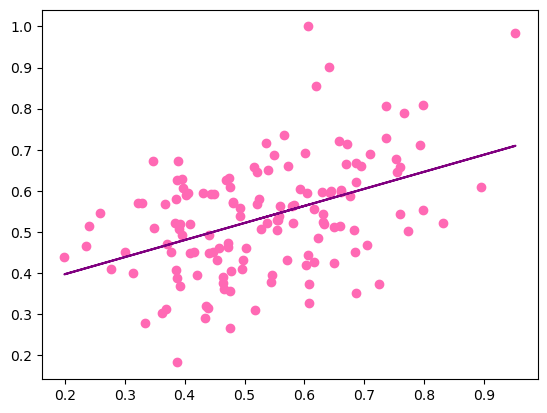

In [15]:
plt.scatter(X_train,y_train,color="hotpink")
y_pred = m*X_train+n
plt.plot(X_train,y_pred,color="purple")

In [16]:
from sklearn.metrics import mean_squared_error
y_test_pred = m*X_test + n
testing_error = mean_squared_error(y_test, y_test_pred)
print("Testing Mean Squared Error:", testing_error)

Testing Mean Squared Error: 0.027629530250748133


In [40]:
#q1
X = x[:,1]
Y = x[:,0]
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X.reshape(-1,1),Y.reshape(-1,1))
print("m=",reg.intercept_)
print("n=",reg.coef_)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x[:,0],x[:,1],test_size=0.30,
random_state=0)

m=0
n=0
L=0.8
epochs=900
for i in range(epochs):
    m,n = gd(X_train,y_train,m,n,L)
    print(m,n)

m= [0.25816704]
n= [[0.51538555]]
0.4704090770385249 0.8568493633015555
-0.01901115072677806 -0.05827535116795779
0.5103468135553654 0.9080212307510758
-0.04217093781254544 -0.1230246583389627
0.5536778011240897 0.966614108085615
-0.06991836616696745 -0.19511925562672583
0.6009198988174135 1.033525039394113
-0.10275280886323424 -0.2755388348307304
0.652652407216408 1.1097675461273853
-0.14124145239738695 -0.365385351924743
0.7095241086359259 1.1964863179380196
-0.18602770071026942 -0.46589869570522
0.7722623183083505 1.294973778143758
-0.23784065929693698 -0.5784743430372143
0.8416830756902162 1.4066887619040784
-0.2975058361893047 -0.7046832536619911
0.9187026214527642 1.5332775754958865
-0.36595721402356773 -0.8462942896860577
1.0043503242008658 1.6765977392226423
-0.4442508670442671 -1.0052994811170408
1.0997832418002549 1.8387447549816969
-0.5335803190336226 -1.1839424996680705
1.2063025256797708 2.0220822828995537
-0.635293863105467 -1.384750749105232
1.3253719029503124 2.22927616

In [41]:
from sklearn.metrics import mean_squared_error
y_test_pred = m*X_test + n
testing_error = mean_squared_error(y_test, y_test_pred)
print("Testing Mean Squared Error:", testing_error)

Testing Mean Squared Error: 1.868814364773174e+46


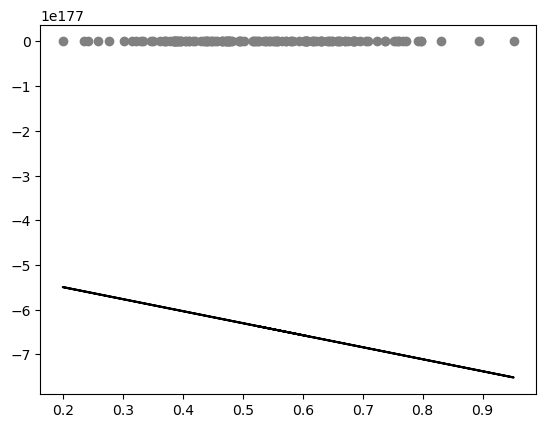

In [39]:
plt.scatter(X_train,y_train,color="gray")
y_pred = m*X_train+n
plt.plot(X_train,y_pred,color="black")